In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -r /content/drive/MyDrive/Face_Emotion_Recognition_training_custom-main/requirements.txt

In [ ]:
!pip install keras_preprocessing

In [ ]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
import keras_preprocessing.image.utils
from PIL import Image

In [ ]:
from PIL import Image
import os

def read_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            try:
                image = Image.open(file_path)
                images.append(image)
            except Exception as e:
                print(f"Error reading image {file_path}: {str(e)}")
    return images

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Đọc dữ liệu từ file labels.csv
data = pd.read_csv('/content/drive/MyDrive/Face_Emotion_Recognition_training_custom-main/labels.csv')

# Chọn các cột thuộc tính làm ground truth
ground_truth_cols = ['age', 'emotion', 'gender', 'race', 'masked', 'skintone']
ground_truth = data[ground_truth_cols]

# Chuyển đổi các giá trị ground truth thành dạng số nguyên sử dụng LabelEncoder
label_encoders = {}
for col in ground_truth_cols:
    le = LabelEncoder()
    ground_truth[col] = le.fit_transform(ground_truth[col])
    label_encoders[col] = le

# Tạo mảng numpy chứa các ảnh
images = np.zeros((len(data), 48, 48, 1))  # Chỉ sử dụng 1 kênh màu (ảnh xám)
for i, file_name in enumerate(data['file_name']):
    # Đọc ảnh từ file và chuyển đổi thành mảng numpy
    folder_path = "/content/drive/MyDrive/Face_Emotion_Recognition_training_custom-main/images_sample"
    image_list = read_images_from_folder(folder_path)
    if i < len(image_list):
        image = image_list[i]
        images[i] = image

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(images, ground_truth, test_size=0.2, random_state=42)

# Xây dựng mô hình CNN
model = Sequential()
# Convolutional layers
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(ground_truth_cols), activation='softmax'))

# Biên dịch và huấn luyện mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=512, epochs=30, validation_data=(X_test, y_test))

<ipython-input-6-f828c5ef2a1b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ground_truth[col] = le.fit_transform(ground_truth[col])
<ipython-input-6-f828c5ef2a1b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ground_truth[col] = le.fit_transform(ground_truth[col])
<ipython-input-6-f828c5ef2a1b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

Epoch 1/30
24/24 [==============================] - 692s 28s/step - loss: 13.2301 - accuracy: 0.0152 - val_loss: 13.2890 - val_accuracy: 0.0026
Epoch 2/30
24/24 [==============================] - 659s 27s/step - loss: 13.2296 - accuracy: 0.0035 - val_loss: 13.2887 - val_accuracy: 0.0026
Epoch 3/30
24/24 [==============================] - 668s 28s/step - loss: 13.2291 - accuracy: 0.0036 - val_loss: 13.2880 - val_accuracy: 0.0016
Epoch 4/30
24/24 [==============================] - 661s 28s/step - loss: 13.2286 - accuracy: 0.0029 - val_loss: 13.2877 - val_accuracy: 0.0016
Epoch 5/30
24/24 [==============================] - 660s 28s/step - loss: 13.2285 - accuracy: 0.6479 - val_loss: 13.2876 - val_accuracy: 0.0016
Epoch 6/30
24/24 [==============================] - 644s 27s/step - loss: 13.2280 - accuracy: 0.2916 - val_loss: 13.2871 - val_accuracy: 0.0016
Epoch 7/30
24/24 [==============================] - 664s 28s/step - loss: 13.2278 - accuracy: 0.4342 - val_loss: 13.2869 - val_accuracy:

In [ ]:
model_json = model.to_json()
with open("faceanalysis.json",'w') as json_file:
    json_file.write(model_json)
model.save("faceanalysis.h5")

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from keras.models import load_model
import os

# Đường dẫn đến tập dữ liệu kiểm thử
test_image_folder = '/content/drive/MyDrive/Face_Emotion_Recognition_training_custom-main/crop_test'

# Đường dẫn đến mô hình đã được huấn luyện
model_path = '/content/drive/MyDrive/Face_Emotion_Recognition_training_custom-main/model/faceanalysis.h5'

# Đường dẫn đến file JSON chứa ánh xạ image_id và file_name
# json_file_path = '/content/drive/MyDrive/Face_Emotion_Recognition_training_custom-main/file_name_to_image_id_private.json'
json_file_path = '/content/drive/MyDrive/Face_Emotion_Recognition_training_custom-main/file_name_to_image_id.json'

# Đọc mô hình đã được huấn luyện
model = load_model(model_path)

# Tạo mảng numpy chứa các ảnh kiểm thử và thông tin bbox
test_images = []
test_bboxes = []
image_ids = []

# Lấy danh sách các file ảnh đã crop
image_files = [f for f in os.listdir(test_image_folder) if f.endswith('.jpg')]

for file_name in image_files:
    image_path = os.path.join(test_image_folder, file_name)

    # Check if the file exists
    if os.path.exists(image_path):
        # Đọc ảnh và chuyển đổi về ảnh xám
        image = Image.open(image_path).convert('L')
        # Resize ảnh về kích thước (48, 48) và chuyển đổi thành mảng numpy
        resized_image = np.array(image.resize((48, 48)))
        # Thêm một chiều cho mảng
        resized_image = np.expand_dims(resized_image, axis=-1)
        # Chuẩn hóa và thêm vào danh sách
        test_images.append(resized_image / 255.0)
        test_bboxes.append(file_name.split('.')[0])  # Assuming the file name format is "image_xxx"
        image_ids.append(file_name.split('.')[0])  # Assuming image_id is the same as file_name
    else:
        print(f"Image not found: {image_path}")

# Check if test_images is non-empty before predicting
if test_images:
    # Convert lists to numpy arrays
    test_images = np.array(test_images)

    # Dự đoán các thuộc tính từ tập kiểm thử
    predictions = model.predict(test_images)

    # Chuyển đổi kết quả dự đoán thành DataFrame
    result_df = pd.DataFrame(predictions, columns=ground_truth_cols)

    # Thêm cột 'bbox' chứa thông tin x, y, w, h dạng string
    result_df['bbox'] = test_bboxes
    # Thêm cột 'file_name'
    result_df['file_name'] = test_bboxes
    # Thêm cột 'image_id'
    result_df['image_id'] = image_ids

    # Lưu vào file CSV
    result_csv_file = '/content/drive/MyDrive/Face_Emotion_Recognition_training_custom-main/answer.csv'
    result_df.to_csv(result_csv_file, index=False)

    print(f"Predictions saved to {result_csv_file}")
else:
    print("No valid images found for prediction.")


69/69 [==============================] - 21s 298ms/step
Predictions saved to /content/drive/MyDrive/Face_Emotion_Recognition_training_custom-main/answer.csv


In [ ]:
from keras.models import model_from_json

In [ ]:
# json_file = open("/content/drive/MyDrive/Face_Emotion_Recognition_training_custom-main/model/faceanalysis.json", "r")
# model_json = json_file.read()
# # json_file.close()
# model = model_from_json(model_json)
# model.load_weights("/content/drive/MyDrive/Face_Emotion_Recognition_training_custom-main/model/faceanalysis.h5")

# Predicting Test Data

In [ ]:
# !unzip  /content/drive/MyDrive/Face_Emotion_Recognition_training_custom-main/public_test.zip -d /content/drive/MyDrive/Face_Emotion_Recognition_training_custom-main/private_test
# !unzip  /content/drive/MyDrive/Face_Emotion_Recognition_training_custom-main/public_test.zip -d /content/drive/MyDrive/Face_Emotion_Recognition_training_custom-main/public_test

Archive:  /content/drive/MyDrive/Face_Emotion_Recognition_training_custom-main/public_test.zip
   creating: /content/drive/MyDrive/Face_Emotion_Recognition_training_custom-main/public_test/public_test/
  inflating: /content/drive/MyDrive/Face_Emotion_Recognition_training_custom-main/public_test/public_test/49074608.jpg  
  inflating: /content/drive/MyDrive/Face_Emotion_Recognition_training_custom-main/public_test/public_test/63701630.jpg  
  inflating: /content/drive/MyDrive/Face_Emotion_Recognition_training_custom-main/public_test/public_test/50869636.jpg  
  inflating: /content/drive/MyDrive/Face_Emotion_Recognition_training_custom-main/public_test/public_test/81768353.jpg  
  inflating: /content/drive/MyDrive/Face_Emotion_Recognition_training_custom-main/public_test/public_test/66790091.jpg  
  inflating: /content/drive/MyDrive/Face_Emotion_Recognition_training_custom-main/public_test/public_test/41766113.jpg  
  inflating: /content/drive/MyDrive/Face_Emotion_Recognition_training_cu

1/1 [==============================] - 0s 50ms/step


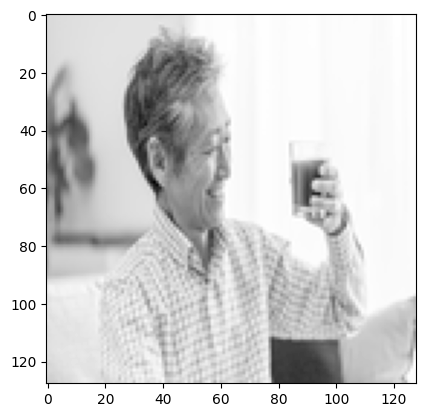

In [ ]:
# image = '/content/drive/MyDrive/Face_Emotion_Recognition_training_custom-main/public_test/private_test/100473997.jpg'
# image = '/content/drive/MyDrive/Face_Emotion_Recognition_training_custom-main/public_test/public_test/100473997.jpg'
# img = get_image_features(image)
# pred = model.predict(img)
# plt.imshow(img.reshape(128, 128),cmap='gray')

1/1 [==============================] - 0s 45ms/step


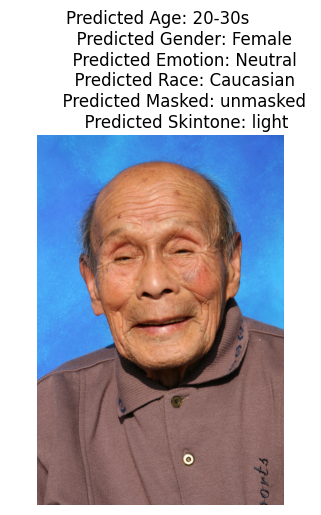

In [ ]:
# img_to_test = '/content/drive/MyDrive/Face_Emotion_Recognition_training_custom-main/images_sample/mnt/md0/projects/sami-hackathon/private/data/85407.jpg'
# features = get_image_features(img_to_test)
# pred = model.predict(features)
# # gender = gender_mapping[round(pred[0][0][0])]

# plt.title(f"""Predicted Age: {age}
#           Predicted Gender: {gender}
#           Predicted Emotion: {emotion}
#           Predicted Race: {race}
#           Predicted Masked: {masked}
#           Predicted Skintone: {skintone}""")
# plt.axis('off')
# plt.imshow(np.array(load_img(img_to_test)))